## Vinho Verde


![title](logode.PNG)

*Vorab Hinweis: Die Zuordnung der Weine erfolgte mittels Zufallszahl. Diese entspricht nicht der Realität. Jedoch sind sonstigen Daten Qualität der UCI Datenbank entnommen und die Weine (County) wurden der Internetseite von Vinho Verde entnommen.*

Der Winzer Vinho Verde hat eine Qualitätskontrolle durchführen lassen. Die Kontrolleure haben eine Datei für den Rotwein und eine Datei für den Weißwein erstellt. Die Beschreibung der Daten können Sie der Textdatei winequality.names entnehmen.

Zudem stellt er eine Liste bereit, über die Produktion der Weine von 1991 - 1998 für die jeweiligen Counties. Der Winzer hat uns mitgeteilt, dass die Weine den gleichen Namen haben, wie die Counties. In jedem County sind jeweils weiße und rote Trauben für die jeweiligen Weine angebaut worden. In der Liste sind die produzierten Liter pro County enthalten.

Der Winzer möchte eine Übersicht erhalten, welche Weine (County) gut und weniger gut von den Experten eingestuft wurden.

Mindestens folgende Fragen möchte er beantwortet haben:

1. Wie viele Weine (rot/weiß) sind in den jeweiligen Qualitätsklassen?
2. Welche Qualitätsklasse hat pro Q-Merkmal den größten bzw. den kleinsten Median. Sehen Sie dies als positiv oder negativ?
3. Wieviel Liter (rot/weiß) sind im Jahre "1998" in den jeweiligen Qualtitätsklassen produziert worden?
4. Welche Weine (Counties) beurteilen die Experten als gut bzw. schlecht ein?

Zusatz:

5. Bestimmen Sie die 3 besten und 3 schlechtesten Weine (Counties) anhand der Qualitätsklassen. Wie ist die Produktionsentwicklung seit 1991 bis inkl. 1998?
6. Können Sie dem Winzer eine Empfehlung geben?

<font color='purple'>**Kommentare und Präsentation sind wichtiger, als alle Aufgaben zu lösen!**</font>

I separate the vinho_verde.csv file to two different data frames for easing the furthur work! 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


df=pd.read_csv('vinho_verde.csv', sep = ';')

df_red = df[['Wine_No', 'Wine','TINTO_91','TINTO_92', 'TINTO_93',
               'TINTO_94',  'TINTO_95', 'TINTO_96','TINTO_97','TINTO_98']].copy()
print(df_red.loc[df_red['TINTO_98'].idxmax()])

df_white = df[['Wine_No', 'Wine','BRANCO_91','BRANCO_92', 'BRANCO_93',
               'BRANCO_94',  'BRANCO_95', 'BRANCO_96','BRANCO_97','BRANCO_98']].copy()
print(df_white.loc[df_white['BRANCO_98'].idxmax()])

df.columns

Wine_No                               1
Wine         AMARANTE                  
TINTO_91                        5589997
TINTO_92                        3158556
TINTO_93                        1737103
TINTO_94                        3515503
TINTO_95                        3341817
TINTO_96                        3967293
TINTO_97                        1200506
TINTO_98                        1471991
Name: 0, dtype: object
Wine_No                               28
Wine          PENAFIEL                  
BRANCO_91                       12659850
BRANCO_92                        7591346
BRANCO_93                        6471673
BRANCO_94                       10011750
BRANCO_95                       11811431
BRANCO_96                       13927368
BRANCO_97                        3520658
BRANCO_98                        5467613
Name: 27, dtype: object


Index(['Wine_No', 'Wine', 'BRANCO_91', 'TINTO_91', 'BRANCO_92', 'TINTO_92',
       'BRANCO_93', 'TINTO_93', 'BRANCO_94', 'TINTO_94', 'BRANCO_95',
       'TINTO_95', 'BRANCO_96', 'TINTO_96', 'BRANCO_97', 'TINTO_97',
       'BRANCO_98', 'TINTO_98'],
      dtype='object')

<AxesSubplot:xlabel='Wine_No'>

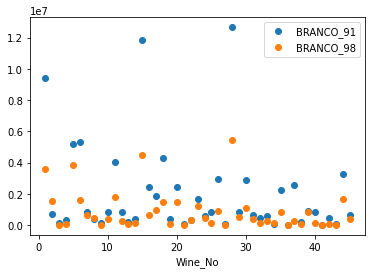

In [14]:
ax=df_white.plot(x='Wine_No', y='BRANCO_91', style='o')
#df_white.plot(x='Wine_No', y='BRANCO_92', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='BRANCO_93', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='BRANCO_94', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='BRANCO_95', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='BRANCO_96', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='BRANCO_97', style='o',ax=ax)
df_white.plot(x='Wine_No', y='BRANCO_98', style='o',ax=ax)

<AxesSubplot:xlabel='Wine_No'>

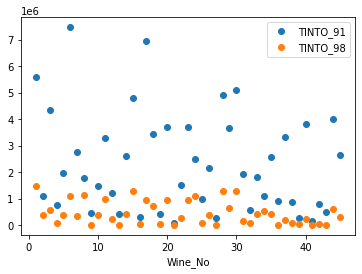

In [15]:
ax=df_red.plot(x='Wine_No', y='TINTO_91', style='o')
#df_white.plot(x='Wine_No', y='TINTO_92', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='TINTO_93', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='TINTO_94', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='TINTO_95', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='TINTO_96', style='o',ax=ax)
#df_white.plot(x='Wine_No', y='TINTO_97', style='o',ax=ax)
df_red.plot(x='Wine_No', y='TINTO_98', style='o',ax=ax)

<AxesSubplot:xlabel='Wine_No'>

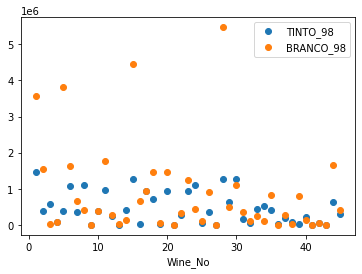

In [16]:
ax=df_red.plot(x='Wine_No', y='TINTO_98', style='o')
df_white.plot(x='Wine_No', y='BRANCO_98', style='o',ax=ax)

The below cells are related to the quality catalogs for red and white wines! As the 'wine' column is randomly assigned to these catalogs by groupby and mean of the properties like 'quality' we will lose some information becasue the mean value would be very close together. 

I decided first explore the data and then slecet a random wine number and join the the first catalog.

In [31]:
redw=pd.read_csv('winequality-red.csv')
whitew=pd.read_csv('winequality-white.csv')
redw.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,36
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,41
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,10
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,41


<AxesSubplot:>

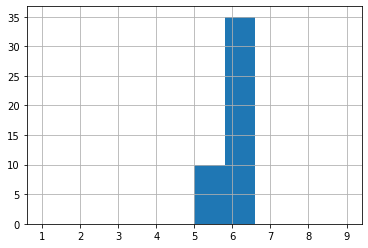

In [18]:
whitew_temp = whitew.groupby(['wine'])['quality'].mean()
whitew_temp.hist(range=[1,9])


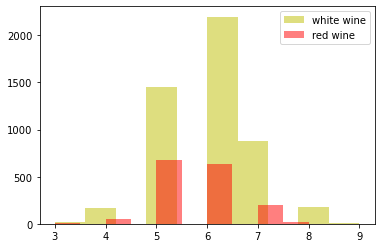

In [20]:
plt.hist(whitew['quality'], alpha = 0.5, color = 'y' , label = 'white wine')
plt.hist(redw['quality'], alpha = 0.5, color = 'r' , label = 'red wine')
plt.legend()
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


df=pd.read_csv('vinho_verde.csv', sep = ';')

df_red = df[['Wine_No', 'Wine','TINTO_91','TINTO_92', 'TINTO_93',
               'TINTO_94',  'TINTO_95', 'TINTO_96','TINTO_97','TINTO_98']].copy()
print(df_red.TINTO_98.idxmax())

df_white = df[['Wine_No', 'Wine','BRANCO_91','BRANCO_92', 'BRANCO_93',
               'BRANCO_94',  'BRANCO_95', 'BRANCO_96','BRANCO_97','BRANCO_98']].copy()

df.head()

0


,Wine_No,Wine,BRANCO_91,TINTO_91,BRANCO_92,TINTO_92,BRANCO_93,TINTO_93,BRANCO_94,TINTO_94,BRANCO_95,TINTO_95,BRANCO_96,TINTO_96,BRANCO_97,TINTO_97,BRANCO_98,TINTO_98
0,1,AMARANTE,9384586,5589997,6274141,3158556,4638903,1737103,10220935,3515503,7361699,3341817,9767795,3967293,2993953,1200506,3561823,1471991
1,2,AMARES,692627,1108743,603590,639570,1318499,310459,1656282,743314,1114088,562730,1446000,957130,631020,266060,1556420,377580
2,3,ARCOS DE VALDEVEZ,123910,4358522,90005,1893070,51568,1144503,120422,2358884,98709,1704120,146925,2619910,24141,483297,28505,585668
3,4,AROUCA,326880,742570,186530,353610,119829,173189,210515,435335,268615,380450,294985,399668,91010,105630,83235,91230
4,5,BAIAO,5185397,1975692,4430023,1190585,3848321,804593,6568629,872162,5324270,819944,5701031,1187165,2170606,385318,3828730,387407


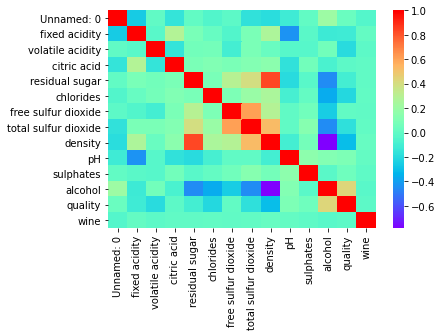

In [140]:
sns.heatmap(whitew.corr(), cmap = 'rainbow');

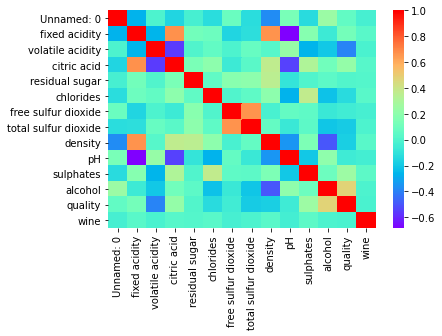

In [24]:
sns.heatmap(redw.corr(), cmap = 'rainbow');

<AxesSubplot:xlabel='quality'>

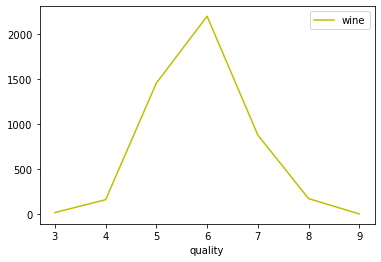

In [29]:
whitew_count = whitew.groupby(['quality']).count()
whitew_count.reset_index(inplace=True)
whitew_count.plot('quality','wine',color='y')

<AxesSubplot:xlabel='quality'>

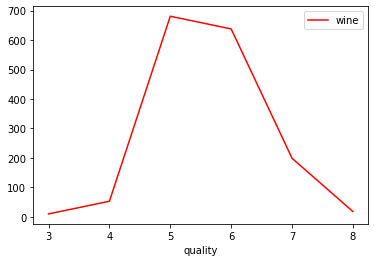

In [33]:
redw_count = redw.groupby(['quality']).count()
redw_count.reset_index(inplace=True)
redw_count.plot('quality','wine',color='r')

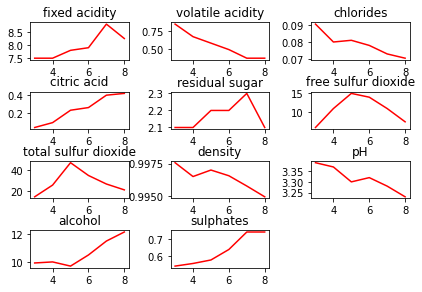

In [183]:
redw_count = redw.groupby(['quality']).median()
redw_count.reset_index(inplace=True)

redw_count.columns
fig, axs = plt.subplots(4, 3)
fig.tight_layout()
axs[0, 0].plot(redw_count['quality'], redw_count['fixed acidity'],color='red')
axs[0, 0].set_title('fixed acidity')

axs[0, 1].plot(redw_count['quality'], redw_count['volatile acidity'],color='red')
axs[0, 1].set_title('volatile acidity')

axs[0, 2].plot(redw_count['quality'], redw_count['chlorides'],color='red')
axs[0, 2].set_title('chlorides')

axs[1, 0].plot(redw_count['quality'], redw_count['citric acid'],color='red')
axs[1, 0].set_title('citric acid')

axs[1, 1].plot(redw_count['quality'], redw_count['residual sugar'],color='red')
axs[1, 1].set_title('residual sugar')

axs[1, 2].plot(redw_count['quality'], redw_count['free sulfur dioxide'],color='red')
axs[1, 2].set_title('free sulfur dioxide')

axs[2, 0].plot(redw_count['quality'], redw_count['total sulfur dioxide'],color='red')
axs[2, 0].set_title('total sulfur dioxide')

axs[2, 1].plot(redw_count['quality'], redw_count['density'],color='red')
axs[2, 1].set_title('density')

axs[2, 2].plot(redw_count['quality'], redw_count['pH'],color='red')
axs[2, 2].set_title('pH')

axs[3, 0].plot(redw_count['quality'], redw_count[ 'alcohol'],color='red')
axs[3, 0].set_title( 'alcohol')

axs[3, 1].plot(redw_count['quality'], redw_count[ 'sulphates'],color='red')
axs[3, 1].set_title( 'sulphates')

fig.delaxes(axs[3][2])






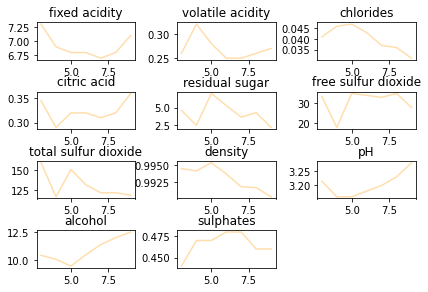

In [184]:
whitew_median = whitew.groupby(['quality']).median()
whitew_median.reset_index(inplace=True)

fig, axs = plt.subplots(4, 3)
fig.tight_layout()
axs[0, 0].plot(whitew_median['quality'], whitew_median['fixed acidity'],color='navajowhite')
axs[0, 0].set_title('fixed acidity')

axs[0, 1].plot(whitew_median['quality'], whitew_median['volatile acidity'],color='navajowhite')
axs[0, 1].set_title('volatile acidity')

axs[0, 2].plot(whitew_median['quality'], whitew_median['chlorides'],color='navajowhite')
axs[0, 2].set_title('chlorides')

axs[1, 0].plot(whitew_median['quality'], whitew_median['citric acid'],color='navajowhite')
axs[1, 0].set_title('citric acid')

axs[1, 1].plot(whitew_median['quality'], whitew_median['residual sugar'],color='navajowhite')
axs[1, 1].set_title('residual sugar')

axs[1, 2].plot(whitew_median['quality'], whitew_median['free sulfur dioxide'],color='navajowhite')
axs[1, 2].set_title('free sulfur dioxide')

axs[2, 0].plot(whitew_median['quality'], whitew_median['total sulfur dioxide'],color='navajowhite')
axs[2, 0].set_title('total sulfur dioxide')

axs[2, 1].plot(whitew_median['quality'], whitew_median['density'],color='navajowhite')
axs[2, 1].set_title('density')

axs[2, 2].plot(whitew_median['quality'], whitew_median['pH'],color='navajowhite')
axs[2, 2].set_title('pH')

axs[3, 0].plot(whitew_median['quality'], whitew_median[ 'alcohol'],color='navajowhite')
axs[3, 0].set_title( 'alcohol')

axs[3, 1].plot(whitew_median['quality'], whitew_median[ 'sulphates'],color='navajowhite')
axs[3, 1].set_title( 'sulphates')

fig.delaxes(axs[3][2])
